In [1]:
# import libraries
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# importing dataset
df2 = pd.read_excel("./dataset/site2.xlsx")


In [4]:
# check the length of each dataset
len(df2)
# len(df2)
# len(df3)

70176

In [5]:
# Check Columns
df2.columns

Index(['Time(year-month-day h:m:s)', 'Wind speed at height of 10 meters (m/s)',
       'Wind direction at height of 10 meters (˚)',
       'Wind speed at height of 30 meters (m/s)',
       'Wind direction at height of 30 meters (˚)',
       'Wind speed at height of 50 meters (m/s)',
       'Wind direction at height of 50 meters (˚)', 'WS_hub', 'WD_hub',
       'Air temperature  (°C) ', 'Atmosphere (hpa)', 'Power (MW)'],
      dtype='object')

In [6]:
# Rename Columns
df2 = df2.rename(columns={
    'Time(year-month-day h:m:s)': 'Timestamp',
    'Wind speed at height of 10 meters (m/s)': 'WS_10',
    'Wind direction at height of 10 meters (˚)': 'WD_10',
    'Wind speed at height of 30 meters (m/s)': 'WS_30',
    'Wind direction at height of 30 meters (˚)': 'WD_30',
    'Wind speed at height of 50 meters (m/s)': 'WS_50',
    'Wind direction at height of 50 meters (˚)': 'WD_50',
    'Wind speed - at the height of wheel hub (m/s)': 'WS_hub',
    'Wind speed - at the height of wheel hub (˚)': 'WD_hub',
    'Air temperature  (°C) ': 'Air_T',
    'Atmosphere (hpa)': 'Air_P',
    'Power (MW)': 'Power'
})

In [7]:
# Check datatypes
df2.dtypes

Timestamp     object
WS_10        float64
WD_10        float64
WS_30        float64
WD_30        float64
WS_50        float64
WD_50        float64
WS_hub       float64
WD_hub       float64
Air_T        float64
Air_P        float64
Power        float64
dtype: object

In [8]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

In [9]:
df2.set_index('Timestamp', inplace=True)

In [10]:
#print top values
df2.head()
# Frequency - 15 Seconds

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_hub,WD_hub,Air_T,Air_P,Power
Timestamp,,,,,,,,,,,
2019-01-01 00:00:00,2.951,124.685,4.634,114.568,3.869,102.139,2.645,103.023,-12.735,887.187,33.451336
2019-01-01 00:15:00,2.951,129.697,2.951,118.488,2.951,97.463,2.186,108.914,-12.992,887.227,36.811337
2019-01-01 00:30:00,2.951,124.756,3.563,118.210,2.798,91.528,2.492,97.322,-12.745,887.094,31.172535
2019-01-01 00:45:00,2.186,129.019,2.339,112.761,2.339,94.015,1.281,99.393,-12.904,887.214,27.836002
2019-01-01 01:00:00,2.033,121.358,1.880,105.626,2.186,99.392,2.186,95.703,-12.979,887.227,31.192802


In [11]:
# bottom values
df2.tail()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_hub,WD_hub,Air_T,Air_P,Power
Timestamp,,,,,,,,,,,
2020-12-31 22:45:00,2.518,123.296,2.747,103.838,2.518,89.739,2.874,94.430,-12.889,887.686,0.045933
2020-12-31 23:00:00,0.840,100.233,2.302,89.572,2.724,80.741,2.592,93.190,-13.337,887.717,0.080467
2020-12-31 23:15:00,0.409,86.624,1.727,103.470,2.288,94.421,2.237,97.814,-13.889,887.464,0.000000
2020-12-31 23:30:00,0.037,114.375,1.168,99.424,1.523,85.928,1.778,89.808,-13.543,887.282,0.000000
2020-12-31 23:45:00,1.080,131.694,1.421,99.528,1.219,86.036,1.574,90.939,-12.931,887.150,0.008467


In [12]:
# Check Min and Max
print("Timestamp")
print(df2.index.min());
print(df2.index.max());

print("")
print("Wind Speed - 10")
print(df2['WS_10'].min());
print(df2['WS_10'].max());

print("")
print("Wind Direction - 10")
print(df2['WD_10'].min());
print(df2['WD_10'].max());

print("")
print("Wind Speed - 30")
print(df2['WS_30'].min());
print(df2['WS_30'].max());

print("")
print("Wind Direction - 30")
print(df2['WD_30'].min());
print(df2['WD_30'].max());

print("")
print("Wind Speed - 50")
print(df2['WS_50'].min());
print(df2['WS_50'].max());

print("")
print("Wind Direction - 50")
print(df2['WD_50'].min());
print(df2['WD_50'].max());

print("")
print("Wind Speed - hub")
print(df2['WS_hub'].min());
print(df2['WS_hub'].max());

print("")
print("Wind Direction - hub")
print(df2['WD_hub'].min());
print(df2['WD_hub'].max());

print("")
print("Air - Temperature")
print(df2['Air_T'].min());
print(df2['Air_T'].max());

print("")
print("Air - Pressure")
print(df2['Air_P'].min());
print(df2['Air_P'].max());

print("")
print("Power")
print(df2['Power'].min());
print(df2['Power'].max());

Timestamp
2019-01-01 00:00:00
2020-12-31 23:45:00

Wind Speed - 10
0.0
23.3

Wind Direction - 10
0.008
359.916

Wind Speed - 30
0.0
27.125

Wind Direction - 30
0.0
360.0

Wind Speed - 50
0.0
28.196

Wind Direction - 50
0.009
359.889

Wind Speed - hub
0.0
28.808

Wind Direction - hub
0.063
359.802

Air - Temperature
-24.547
37.59

Air - Pressure
441.272
900.45

Power
0.0
201.24808


In [13]:
# convert datetime object
# df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
df2.dtypes

WS_10     float64
WD_10     float64
WS_30     float64
WD_30     float64
WS_50     float64
WD_50     float64
WS_hub    float64
WD_hub    float64
Air_T     float64
Air_P     float64
Power     float64
dtype: object

In [14]:
# check for null values
df2.isnull().mean()

WS_10     0.0
WD_10     0.0
WS_30     0.0
WD_30     0.0
WS_50     0.0
WD_50     0.0
WS_hub    0.0
WD_hub    0.0
Air_T     0.0
Air_P     0.0
Power     0.0
dtype: float64

In [15]:
# Describe the data
df2.describe()

,WS_10,WD_10,WS_30,WD_30,WS_50,WD_50,WS_hub,WD_hub,Air_T,Air_P,Power
count,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000,70176.000000
mean,6.325568,218.598444,7.160943,217.546658,7.400046,209.723608,7.558165,207.748026,8.665843,883.222322,72.705279
std,4.021242,85.720104,4.485920,88.465678,4.644244,86.128863,4.863350,85.819192,13.231113,7.903121,55.735581
min,0.000000,0.008000,0.000000,0.000000,0.000000,0.009000,0.000000,0.063000,-24.547000,441.272000,0.000000
25%,3.104000,136.637250,3.538000,123.996250,3.563000,115.306500,3.410000,114.752000,-3.578250,880.643000,14.027617
50%,6.470000,250.564000,7.337000,266.412000,7.541000,257.695000,7.683000,244.942000,10.293500,884.053000,75.401173
75%,9.134000,296.102250,10.163000,295.178000,10.480000,285.124250,10.796000,283.839500,19.958000,887.559000,124.313402
max,23.300000,359.916000,27.125000,360.000000,28.196000,359.889000,28.808000,359.802000,37.590000,900.450000,201.248080


(array([14141.,  2280.,  1727.,  1627.,  2188.,  1691.,  1591.,  1418.,
         1391.,  1312.,  1346.,  1351.,  1353.,  1373.,  1268.,  1374.,
         1326.,  1676.,  1647.,  1784.,  1795.,  2073.,  2949.,  5742.,
         2865.,  2648.,  2203.,  1381.,  1114.,   768.,   699.,   636.,
          384.,   280.,   204.,   243.,   183.,   145.]),
 array([  0.        ,   5.29600211,  10.59200421,  15.88800632,
         21.18400842,  26.48001053,  31.77601263,  37.07201474,
         42.36801684,  47.66401895,  52.96002105,  58.25602316,
         63.55202526,  68.84802737,  74.14402947,  79.44003158,
         84.73603368,  90.03203579,  95.32803789, 100.62404   ,
        105.92004211, 111.21604421, 116.51204632, 121.80804842,
        127.10405053, 132.40005263, 137.69605474, 142.99205684,
        148.28805895, 153.58406105, 158.88006316, 164.17606526,
        169.47206737, 174.76806947, 180.06407158, 185.36007368,
        190.65607579, 195.95207789, 201.24808   ]),
 <BarContainer object of 3

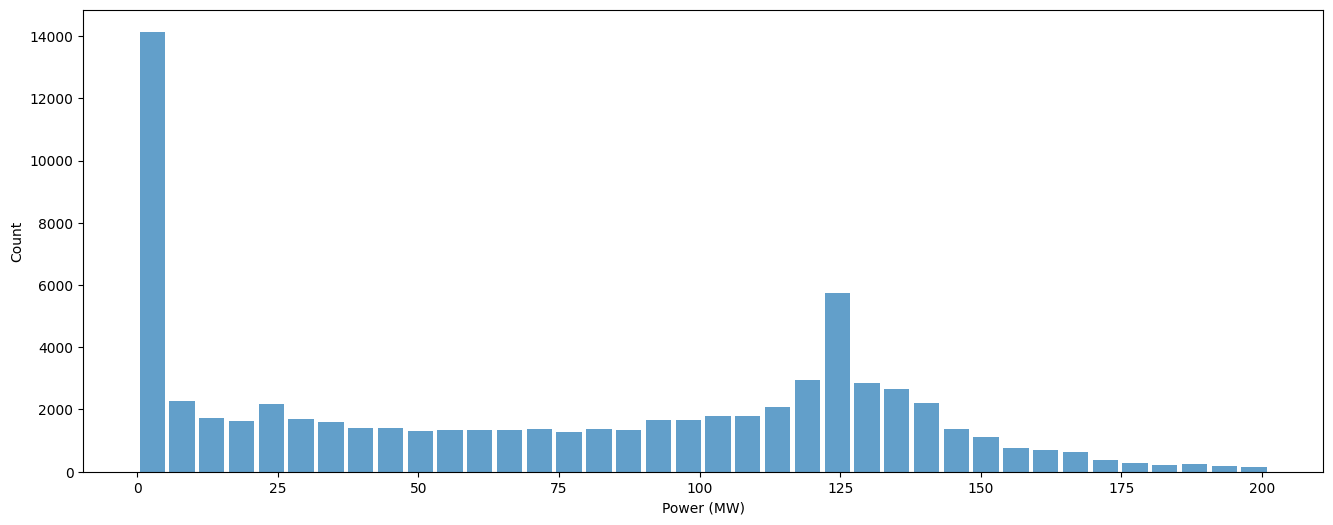

In [16]:
# plot histogram
plt.figure(figsize=(16,6))
plt.xlabel("Power (MW)")
plt.ylabel("Count")

plt.hist(
    x=df2['Power'], bins='auto',
    alpha=0.7, rwidth=0.85
)

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>], dtype=object)

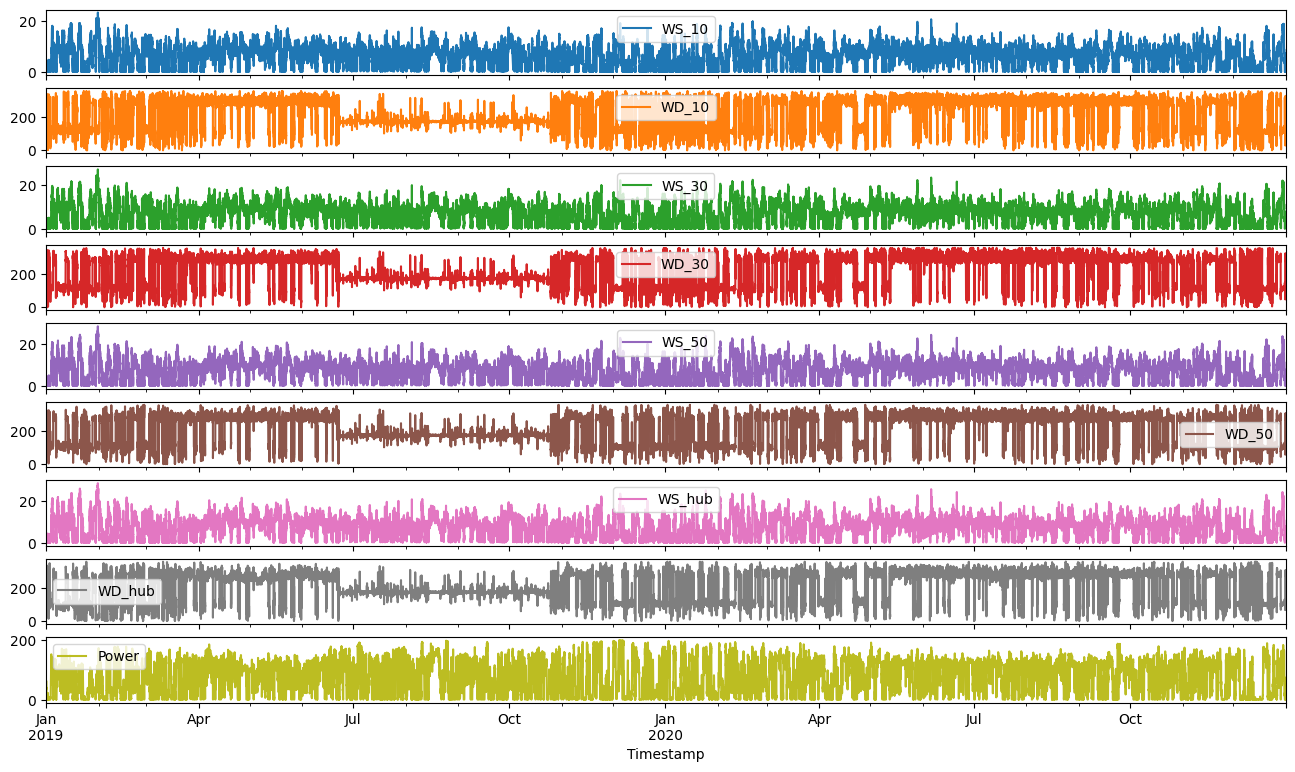

In [17]:
# Line plot
df2[['WS_10','WD_10','WS_30','WD_30','WS_50','WD_50','WS_hub','WD_hub','Power']].plot(subplots=True, figsize=(16, 9))

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>], dtype=object)

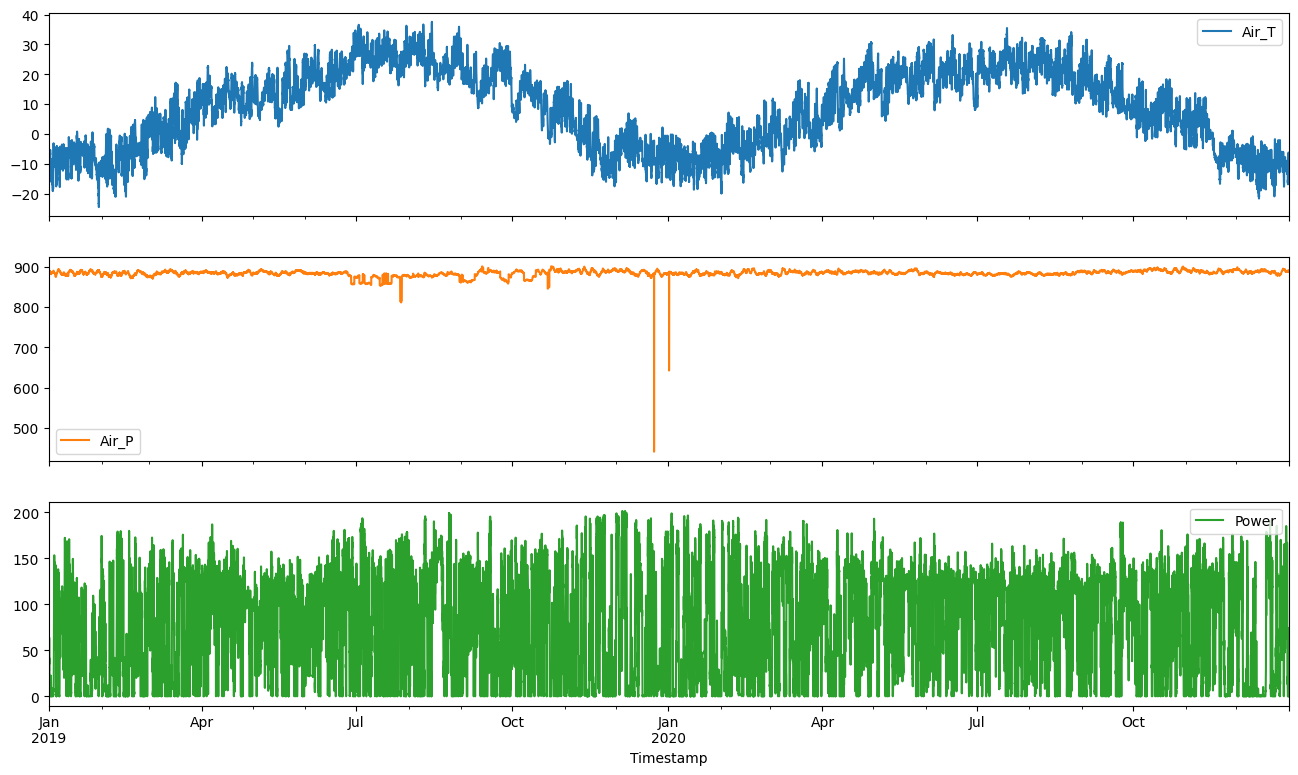

In [18]:
df2[['Air_T','Air_P','Power']].plot(subplots=True, figsize=(16, 9))

<Axes: >

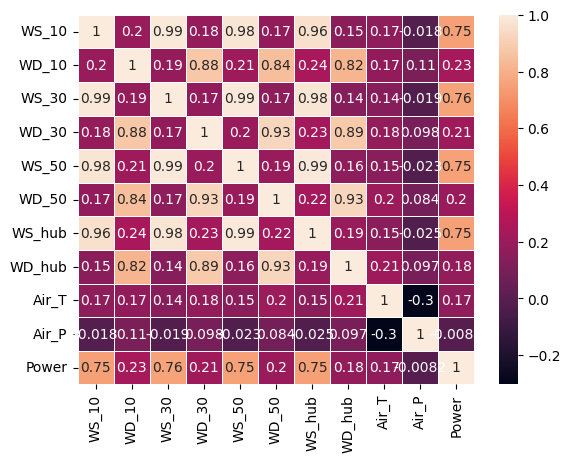

In [20]:
heatmap_df2 = df2
sns.heatmap(heatmap_df2.corr(), annot=True, linewidth=.5)

In [21]:
FEATURES_TO_USE = ['WS_10', 'WS_30', 'WS_50', 'WS_hub']

In [22]:
df2_final = df2[FEATURES_TO_USE]
df2_output = df2[['Power']]

In [23]:
df2_final.head()

,WS_10,WS_30,WS_50,WS_hub
Timestamp,,,,
2019-01-01 00:00:00,2.951,4.634,3.869,2.645
2019-01-01 00:15:00,2.951,2.951,2.951,2.186
2019-01-01 00:30:00,2.951,3.563,2.798,2.492
2019-01-01 00:45:00,2.186,2.339,2.339,1.281
2019-01-01 01:00:00,2.033,1.880,2.186,2.186


In [24]:
df2_final.dtypes

WS_10     float64
WS_30     float64
WS_50     float64
WS_hub    float64
dtype: object

In [25]:
# Seasonality
decomposition = seasonal_decompose(df2_output, model='additive', period=365)

In [26]:
# Trend & Seasonality

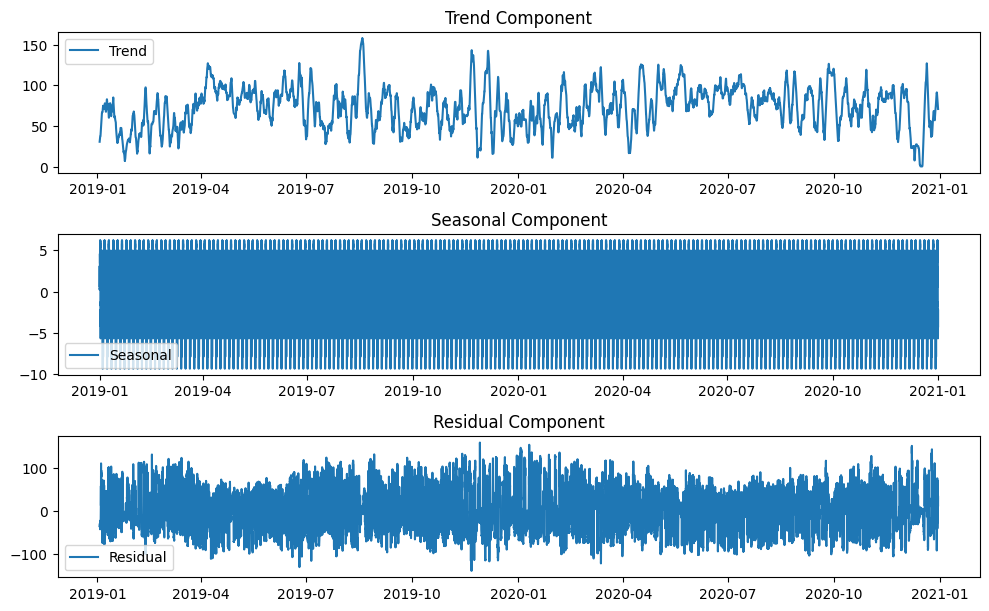

In [27]:
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.legend()
plt.tight_layout()
plt.show()

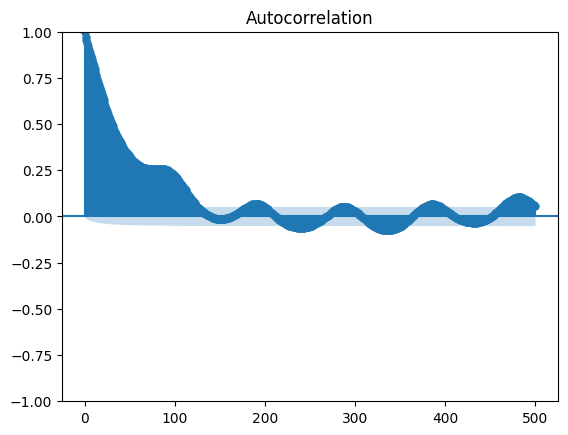

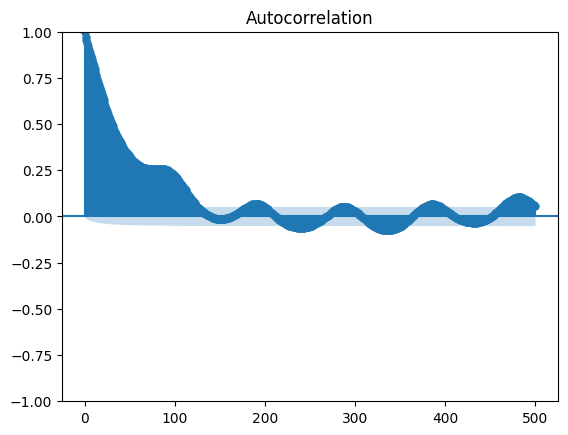

In [28]:
plot_acf(df2['WS_hub'], lags=500)

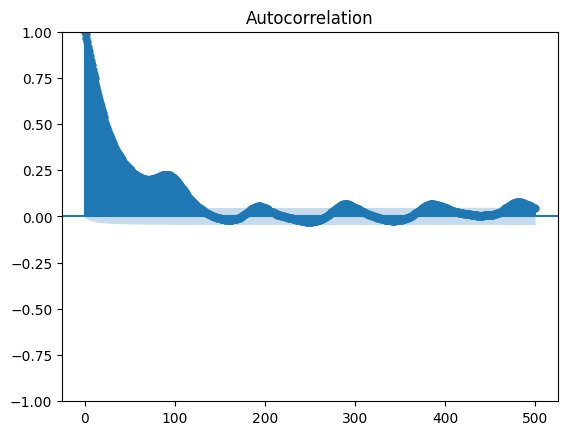

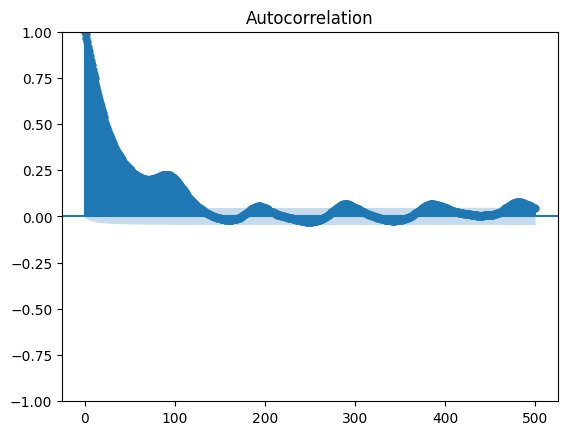

In [30]:
plot_acf(df2_output, lags=500)

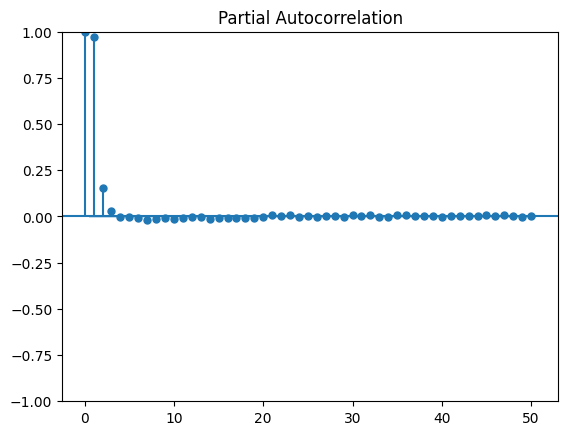

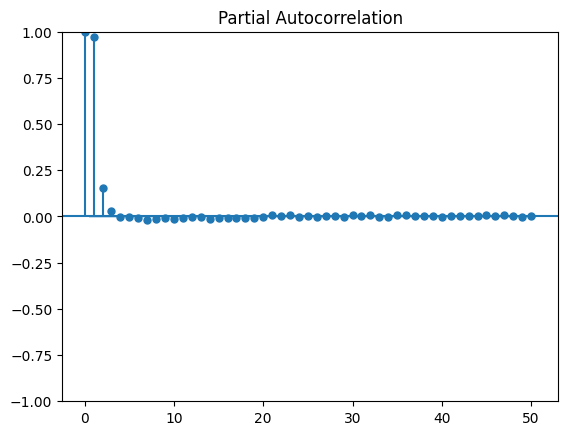

In [31]:
plot_pacf(df2['WS_hub'], lags=50)

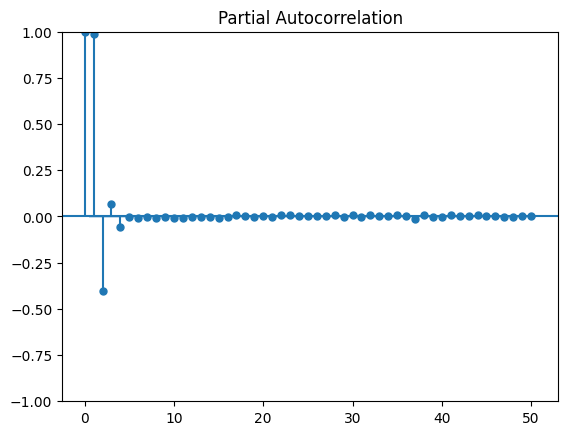

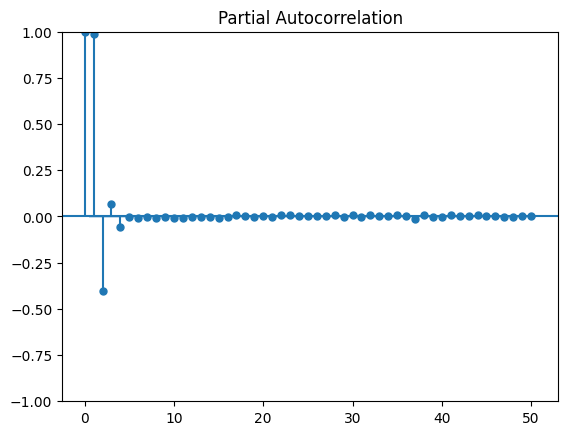

In [33]:
plot_pacf(df2_output, lags=50)